In [32]:
import pandas as pd
import os

path_credit=os.getcwd()+'/archive/credits.csv'
path_title=os.getcwd()+'/archive/titles.csv'
path_amazon=os.getcwd()+'/archive (2)/titles.csv'

credit=pd.read_csv(path_credit)
title=pd.read_csv(path_title)
amazon=pd.read_csv(path_amazon)

### 결측치 확인

In [33]:
import numpy as np

title.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

Text(0.5, 1.0, 'Netflix data before Data Preprocessing')

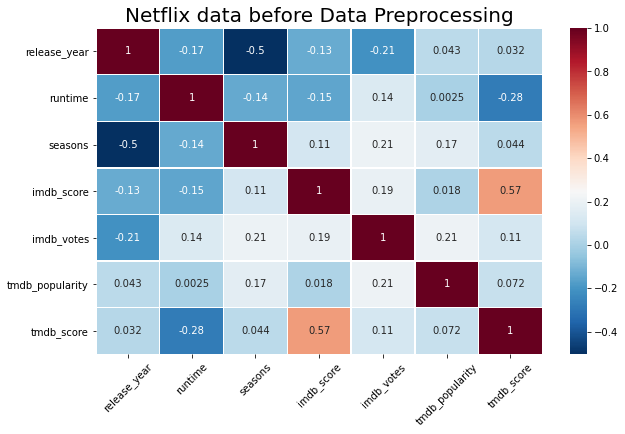

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
netflix_corr = sns.heatmap(title.corr(), annot=True, linewidths=0.5, cmap='RdBu_r')
netflix_corr.set_xticklabels(netflix_corr.get_xticklabels(), rotation=45)
netflix_corr.axes.set_title('Netflix data before Data Preprocessing', fontsize=20)

지워도 되는 결측치들 :

<title.csv>

age_certification , product_countried, runtime, imdb_id,description

In [35]:

del title['production_countries']
del title['imdb_id']
del title['description']
title

,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",NaN,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",NaN,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",NaN,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']",NaN,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",NaN,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,2021,NaN,134,['drama'],NaN,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,2021,NaN,90,['comedy'],NaN,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,[],NaN,NaN,NaN,1.296,10.000


In [5]:
title.isna().sum()

id                      0
title                   1
type                    0
release_year            0
age_certification    2619
runtime                 0
genres                  0
seasons              3744
imdb_score            482
imdb_votes            498
tmdb_popularity        91
tmdb_score            311
dtype: int64

#### seasons 가 tmdb_popularity와 연관 높아 지우지 않고 nan값은 0으로 보간

In [6]:
title['seasons']=title['seasons'].fillna(0)

In [7]:
title.isna().sum()

id                      0
title                   1
type                    0
release_year            0
age_certification    2619
runtime                 0
genres                  0
seasons                 0
imdb_score            482
imdb_votes            498
tmdb_popularity        91
tmdb_score            311
dtype: int64

Text(0.5, 1.0, 'Netflix data After Data Preprocessing')

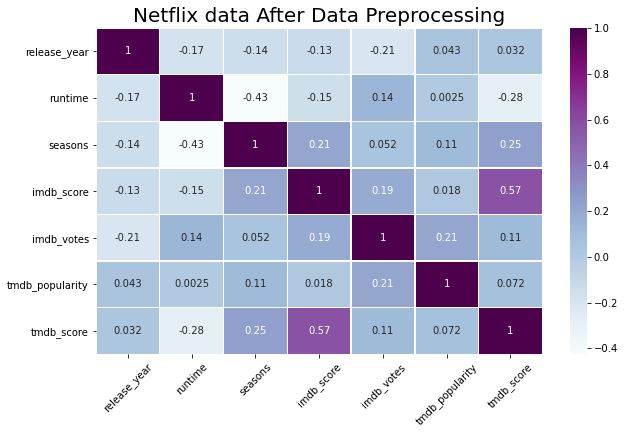

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
netflix_corr = sns.heatmap(title.corr(), annot=True, linewidths=0.5, cmap='BuPu')
netflix_corr.set_xticklabels(netflix_corr.get_xticklabels(), rotation=45)
netflix_corr.axes.set_title('Netflix data After Data Preprocessing', fontsize=20)

썡데이터 인기도

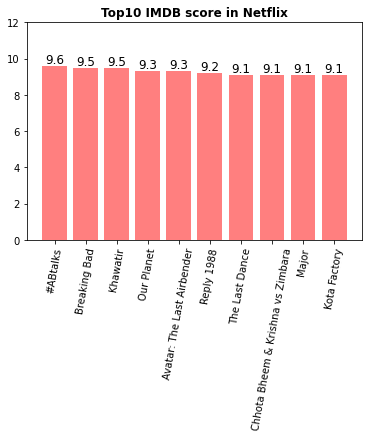

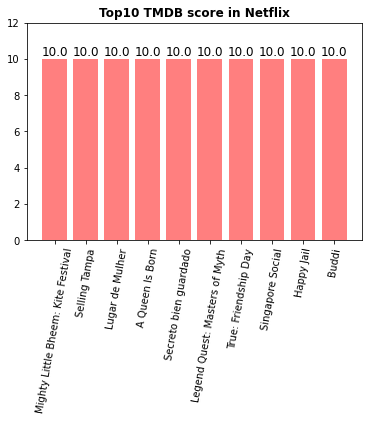

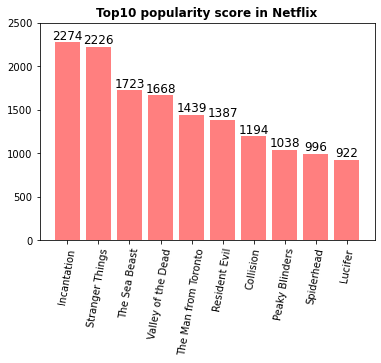

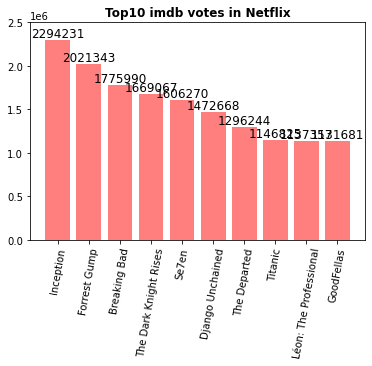

In [59]:
top_pop=title.sort_values('tmdb_popularity',ascending=False)
top_imbd=title.sort_values('imdb_score',ascending=False)
top_tmbd=title.sort_values('tmdb_score',ascending=False)
top_vote=title.sort_values('imdb_votes',ascending=False)

x = top_imbd.head(10)['title']
y = top_imbd.head(10)['imdb_score']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 12)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 IMDB score in Netflix",fontweight="bold")
plt.show()
#-----------------------------------------------------------------------

x = top_tmbd.head(10)['title']
y = top_tmbd.head(10)['tmdb_score']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 12)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 TMDB score in Netflix",fontweight="bold")
plt.show()

#-----------------------------------------------------------------------
x = top_pop.head(10)['title']
y = top_pop.head(10)['tmdb_popularity']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 2500)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.d' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 popularity score in Netflix",fontweight="bold")
plt.show()
#-----------------------------------------------------------------------
x = top_vote.head(10)['title']
y = top_vote.head(10)['imdb_votes']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 2500000)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.d' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 imdb votes in Netflix",fontweight="bold")
plt.show()

In [54]:
top_vote.head(10)

,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4707,tm1143265,Incantation,MOVIE,2022,NaN,111,['horror'],NaN,6.2,5660.0,2274.044,7.400
1123,ts38796,Stranger Things,SHOW,2016,TV-14,61,"['scifi', 'thriller', 'drama', 'fantasy', 'hor...",5.0,8.7,1101055.0,2226.231,8.635
4702,tm1067148,The Sea Beast,MOVIE,2022,PG,115,"['comedy', 'family', 'fantasy', 'scifi', 'anim...",NaN,7.1,18852.0,1723.363,7.634
4714,tm928497,Valley of the Dead,MOVIE,2022,R,101,"['comedy', 'horror', 'war', 'fantasy', 'thrill...",NaN,6.5,114.0,1668.296,6.303
4696,tm852360,The Man from Toronto,MOVIE,2022,PG-13,110,"['action', 'thriller', 'drama', 'romance', 'co...",NaN,5.8,31497.0,1439.906,6.449
4693,ts252861,Resident Evil,SHOW,2022,TV-MA,51,"['scifi', 'thriller', 'action', 'horror']",1.0,3.7,24982.0,1387.392,5.956
5059,tm1210379,Collision,MOVIE,2022,NaN,99,"['drama', 'crime', 'thriller']",NaN,3.9,886.0,1194.149,5.946
833,ts20110,Peaky Blinders,SHOW,2013,TV-MA,58,"['crime', 'drama', 'european']",6.0,8.8,511668.0,1038.077,8.558
4699,tm1020438,Spiderhead,MOVIE,2022,R,106,"['scifi', 'thriller', 'drama', 'action', 'crime']",NaN,5.4,43239.0,996.869,5.800
1136,ts36147,Lucifer,SHOW,2016,TV-14,47,"['scifi', 'crime', 'drama', 'fantasy']",6.0,8.1,313124.0,922.112,8.523


<Figure size 1440x864 with 0 Axes>

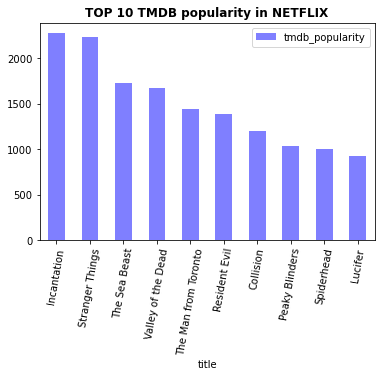

In [10]:
plt.figure(figsize=(20,12))
top_pop.head(10).plot.bar(x='title',y='tmdb_popularity',alpha=0.5,color='b')
#(data=top_pop.head(10),x="title", y="tmdb_popularity")
plt.xticks(rotation=80)
plt.title("TOP 10 TMDB popularity in NETFLIX",fontweight="bold")
plt.show()

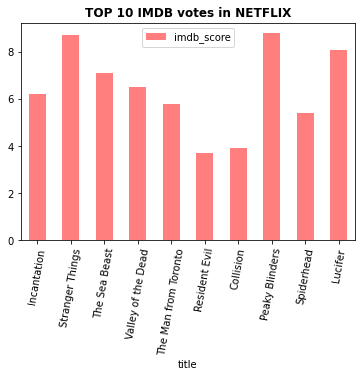

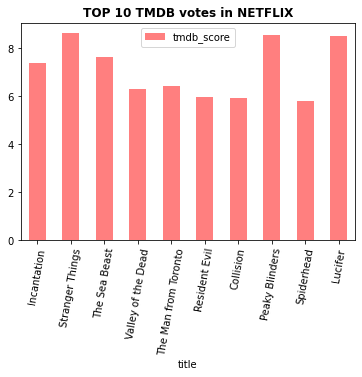

In [11]:
top_pop.head(10).plot.bar(x='title',y='imdb_score',alpha=0.5,color='r')
plt.xticks(rotation=80)
plt.title("TOP 10 IMDB votes in NETFLIX",fontweight="bold")
plt.show()


top_pop.head(10).plot.bar(x='title',y='tmdb_score',alpha=0.5,color='r')
plt.xticks(rotation=80)
plt.title("TOP 10 TMDB votes in NETFLIX",fontweight="bold")
plt.show()

투표

<Figure size 1440x864 with 0 Axes>

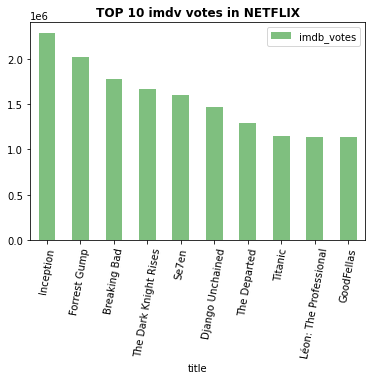

In [12]:
top_votes=title.sort_values('imdb_votes',ascending=False)
top_votes

plt.figure(figsize=(20,12))
top_votes.head(10).plot.bar(x='title',y='imdb_votes',alpha=0.5,color='g')
#(data=top_pop.head(10),x="title", y="tmdb_popularity")
plt.xticks(rotation=80)
plt.title("TOP 10 imdv votes in NETFLIX",fontweight="bold")
plt.show()

In [30]:
top_votes.head(10)

,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
236,tm92641,Inception,MOVIE,2010,PG-13,148,"['action', 'scifi', 'music', 'thriller']",0.0,8.8,2294231.0,108.284,8.400
96,tm122434,Forrest Gump,MOVIE,1994,PG-13,142,"['drama', 'romance']",0.0,8.8,2021343.0,63.449,8.478
215,ts4,Breaking Bad,SHOW,2008,TV-MA,48,"['drama', 'crime', 'thriller']",5.0,9.5,1775990.0,353.848,8.790
636,tm39888,The Dark Knight Rises,MOVIE,2012,PG-13,165,"['thriller', 'action', 'drama', 'crime']",0.0,8.4,1669067.0,91.760,7.768
93,tm15897,Se7en,MOVIE,1995,R,127,"['crime', 'thriller', 'drama']",0.0,8.6,1606270.0,51.633,8.352
642,tm41792,Django Unchained,MOVIE,2012,R,165,"['western', 'drama']",0.0,8.4,1472668.0,66.924,8.150
238,tm27911,The Departed,MOVIE,2006,R,151,"['drama', 'thriller', 'crime', 'action']",0.0,8.5,1296244.0,33.795,8.200
101,tm191110,Titanic,MOVIE,1997,PG-13,194,"['drama', 'romance']",0.0,7.9,1146825.0,155.683,7.878
108,tm116655,Léon: The Professional,MOVIE,1994,R,111,"['crime', 'drama', 'action', 'thriller', 'euro...",0.0,8.5,1137357.0,51.406,8.323
35,tm155787,GoodFellas,MOVIE,1990,R,145,"['drama', 'crime']",0.0,8.7,1131681.0,50.387,8.463


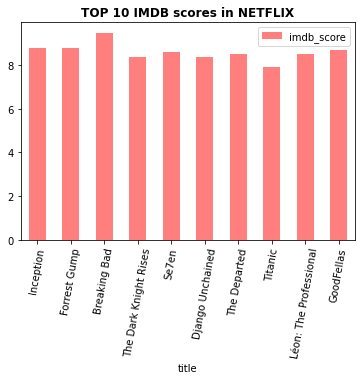

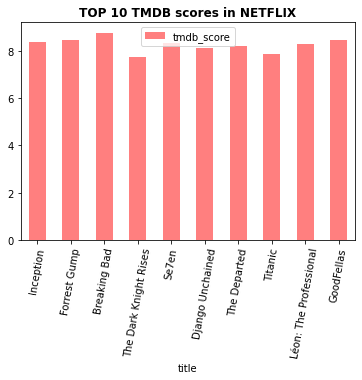

In [13]:
top_votes.head(10).plot.bar(x='title',y='imdb_score',alpha=0.5,color='r')
plt.xticks(rotation=80)
plt.title("TOP 10 IMDB scores in NETFLIX",fontweight="bold")
plt.show()


top_votes.head(10).plot.bar(x='title',y='tmdb_score',alpha=0.5,color='r')
plt.xticks(rotation=80)
plt.title("TOP 10 TMDB scores in NETFLIX",fontweight="bold")
plt.show()

In [14]:
title.isna().sum

<bound method DataFrame.sum of          id  title   type  release_year  age_certification  runtime  genres  \
0     False  False  False         False              False    False   False   
1     False  False  False         False              False    False   False   
2     False  False  False         False              False    False   False   
3     False  False  False         False              False    False   False   
4     False  False  False         False               True    False   False   
...     ...    ...    ...           ...                ...      ...     ...   
5845  False  False  False         False               True    False   False   
5846  False  False  False         False               True    False   False   
5847  False  False  False         False               True    False   False   
5848  False  False  False         False              False    False   False   
5849  False  False  False         False               True    False   False   

      seasons  imdb_

## 결측치 처리

#### imdb_score, imdb_votes, tmdb_popularity, tmdb_score 다 값 없을 경우 제거

In [15]:
all_nan=(title['imdb_score'].isna()) * (title['tmdb_score'].isna())* (title['imdb_votes'].isna())* (title['tmdb_popularity'].isna())
all_nan=list(all_nan)

#4개 모두 없는 행
inde=[]

for i in range(len(all_nan)):
    if all_nan[i]==True:
        inde.append(i)
        
print(inde)

[577, 627, 808, 1072, 1088, 1588, 1668, 1704, 2754, 2930, 2941, 3819, 5483, 5507, 5810, 5844]


C:\conda\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


In [16]:
title=title.drop(index=inde)
title.isna().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification    2608
runtime                 0
genres                  0
seasons                 0
imdb_score            466
imdb_votes            482
tmdb_popularity        75
tmdb_score            295
dtype: int64

#### imdb_score, imdb_votes 둘 중 하나만 없을 경우 대체 

In [17]:
t=pd.DataFrame(title['imdb_score'],title['tmdb_score'])
t

,imdb_score
tmdb_score,
NaN,NaN
8.179,NaN
7.300,NaN
7.811,NaN
7.600,NaN
...,...
NaN,NaN
NaN,NaN
6.300,NaN


##### 하나만 nan 값인 경우

In [18]:
title['imdb_score']=title['imdb_score'].fillna(title['tmdb_score'])

title['tmdb_score']=title['tmdb_score'].fillna(title['imdb_score'])

title

,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",0.0,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",0.0,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",0.0,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']",0.0,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",0.0,6.8,45.0,1.466,6.800
5846,tm898842,C/O Kaadhal,MOVIE,2021,NaN,134,['drama'],0.0,7.7,348.0,NaN,7.700
5847,tm1059008,Lokillo,MOVIE,2021,NaN,90,['comedy'],0.0,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,[],0.0,10.0,NaN,1.296,10.000


#### 둘 다 nan 인경우는 삭제

In [19]:
title=title.dropna(subset=['imdb_score','tmdb_score']).reset_index(drop=True)
title

,id,title,type,release_year,age_certification,runtime,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",0.0,8.2,808582.0,40.965,8.179
1,tm154986,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",0.0,7.7,107673.0,10.010,7.300
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",0.0,8.2,534486.0,15.461,7.811
3,tm120801,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']",0.0,7.7,72662.0,20.398,7.600
4,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",4.0,8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...,...,...,...,...
5757,tm1014599,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",0.0,6.8,45.0,1.466,6.800
5758,tm898842,C/O Kaadhal,MOVIE,2021,NaN,134,['drama'],0.0,7.7,348.0,NaN,7.700
5759,tm1059008,Lokillo,MOVIE,2021,NaN,90,['comedy'],0.0,3.8,68.0,26.005,6.300
5760,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,[],0.0,10.0,NaN,1.296,10.000


In [20]:
title.isna().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification    2572
runtime                 0
genres                  0
seasons                 0
imdb_score              0
imdb_votes            410
tmdb_popularity        75
tmdb_score              0
dtype: int64

#### 그래프 그리기

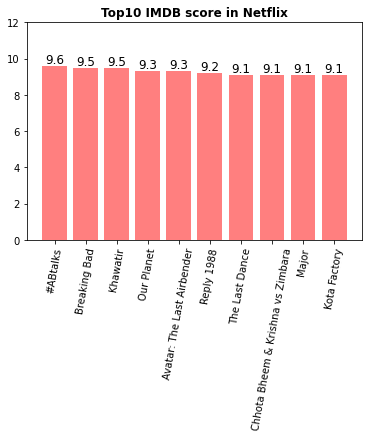

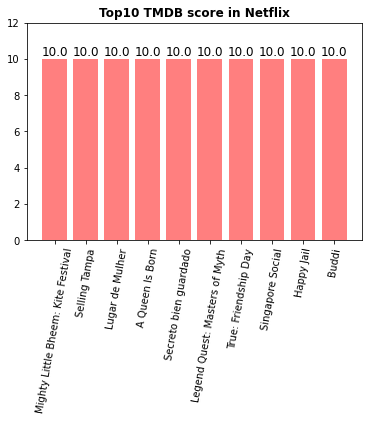

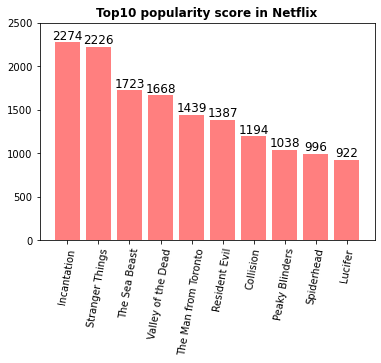

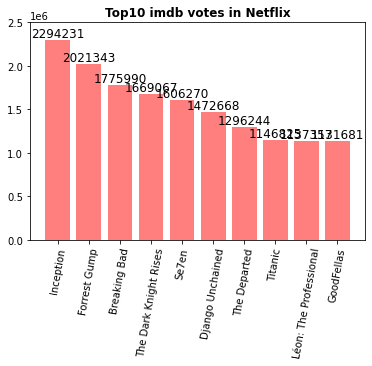

In [60]:
top_pop=title.sort_values('tmdb_popularity',ascending=False)
top_imbd=title.sort_values('imdb_score',ascending=False)
top_tmbd=title.sort_values('tmdb_score',ascending=False)
top_vote=title.sort_values('imdb_votes',ascending=False)

x = top_imbd.head(10)['title']
y = top_imbd.head(10)['imdb_score']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 12)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 IMDB score in Netflix",fontweight="bold")
plt.show()
#-----------------------------------------------------------------------

x = top_tmbd.head(10)['title']
y = top_tmbd.head(10)['tmdb_score']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 12)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 TMDB score in Netflix",fontweight="bold")
plt.show()

#-----------------------------------------------------------------------
x = top_pop.head(10)['title']
y = top_pop.head(10)['tmdb_popularity']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 2500)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.d' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 popularity score in Netflix",fontweight="bold")
plt.show()
#-----------------------------------------------------------------------
x = top_vote.head(10)['title']
y = top_vote.head(10)['imdb_votes']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 2500000)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.d' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 imdb votes in Netflix",fontweight="bold")
plt.show()

인기도

In [21]:
top_pop=title.sort_values('tmdb_popularity',ascending=False)

<Figure size 1440x864 with 0 Axes>

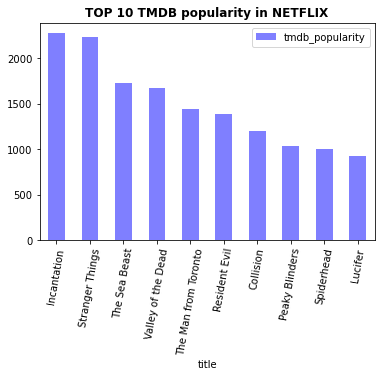

In [22]:
plt.figure(figsize=(20,12))
top_pop.head(10).plot.bar(x='title',y='tmdb_popularity',alpha=0.5,color='b')
#(data=top_pop.head(10),x="title", y="tmdb_popularity")
plt.xticks(rotation=80)
plt.title("TOP 10 TMDB popularity in NETFLIX",fontweight="bold")
plt.show()

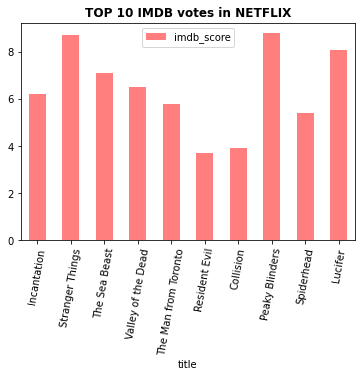

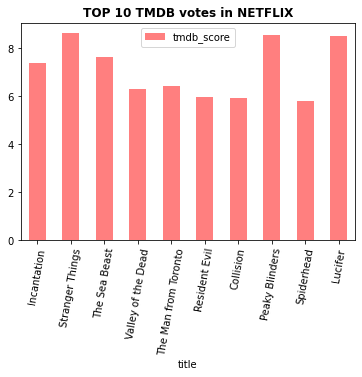

In [23]:

top_pop.head(10).plot.bar(x='title',y='imdb_score',alpha=0.5,color='r')
plt.xticks(rotation=80)
plt.title("TOP 10 IMDB votes in NETFLIX",fontweight="bold")
plt.show()


top_pop.head(10).plot.bar(x='title',y='tmdb_score',alpha=0.5,color='r')
plt.xticks(rotation=80)
plt.title("TOP 10 TMDB votes in NETFLIX",fontweight="bold")
plt.show()

투표수

<Figure size 1440x864 with 0 Axes>

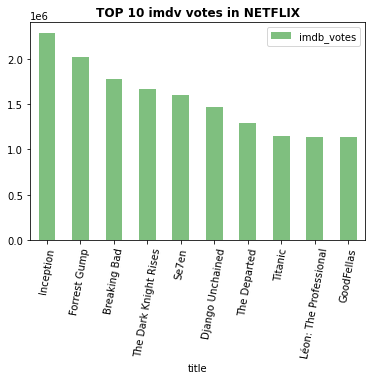

In [24]:
top_votes=title.sort_values('imdb_votes',ascending=False)
top_votes

plt.figure(figsize=(20,12))
top_votes.head(10).plot.bar(x='title',y='imdb_votes',alpha=0.5,color='g')
#(data=top_pop.head(10),x="title", y="tmdb_popularity")
plt.xticks(rotation=80)
plt.title("TOP 10 imdv votes in NETFLIX",fontweight="bold")
plt.show()

TypeError: 'AxesSubplot' object is not iterable

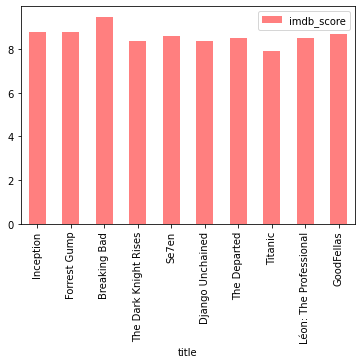

In [62]:
bar=top_votes.head(10).plot.bar(x='title',y='imdb_score',alpha=0.5,color='r')
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=80)
plt.title("TOP 10 IMDB scores in NETFLIX",fontweight="bold")
plt.show()


top_votes.head(10).plot.bar(x='title',y='tmdb_score',alpha=0.5,color='r')
plt.xticks(rotation=80)
plt.title("TOP 10 TMDB scores in NETFLIX",fontweight="bold")
plt.show()

In [ ]:
x = top_imbd.head(10)['title']
y = top_imbd.head(10)['imdb_score']
bar = plt.bar(x, y, alpha=0.5,color='r')
plt.ylim(0, 12)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)

plt.xticks(rotation=80)
plt.title("Top10 IMDB score in Netflix",fontweight="bold")
plt.show()